In [1]:
import pickle

with open('data.pkl', 'rb') as file:
    loaded_data = pickle.load(file)


In [5]:
for i, (obs, action, reward) in enumerate(zip(loaded_data['obs'], loaded_data['actions'], loaded_data['reward'])):
    if i > 0:
        break


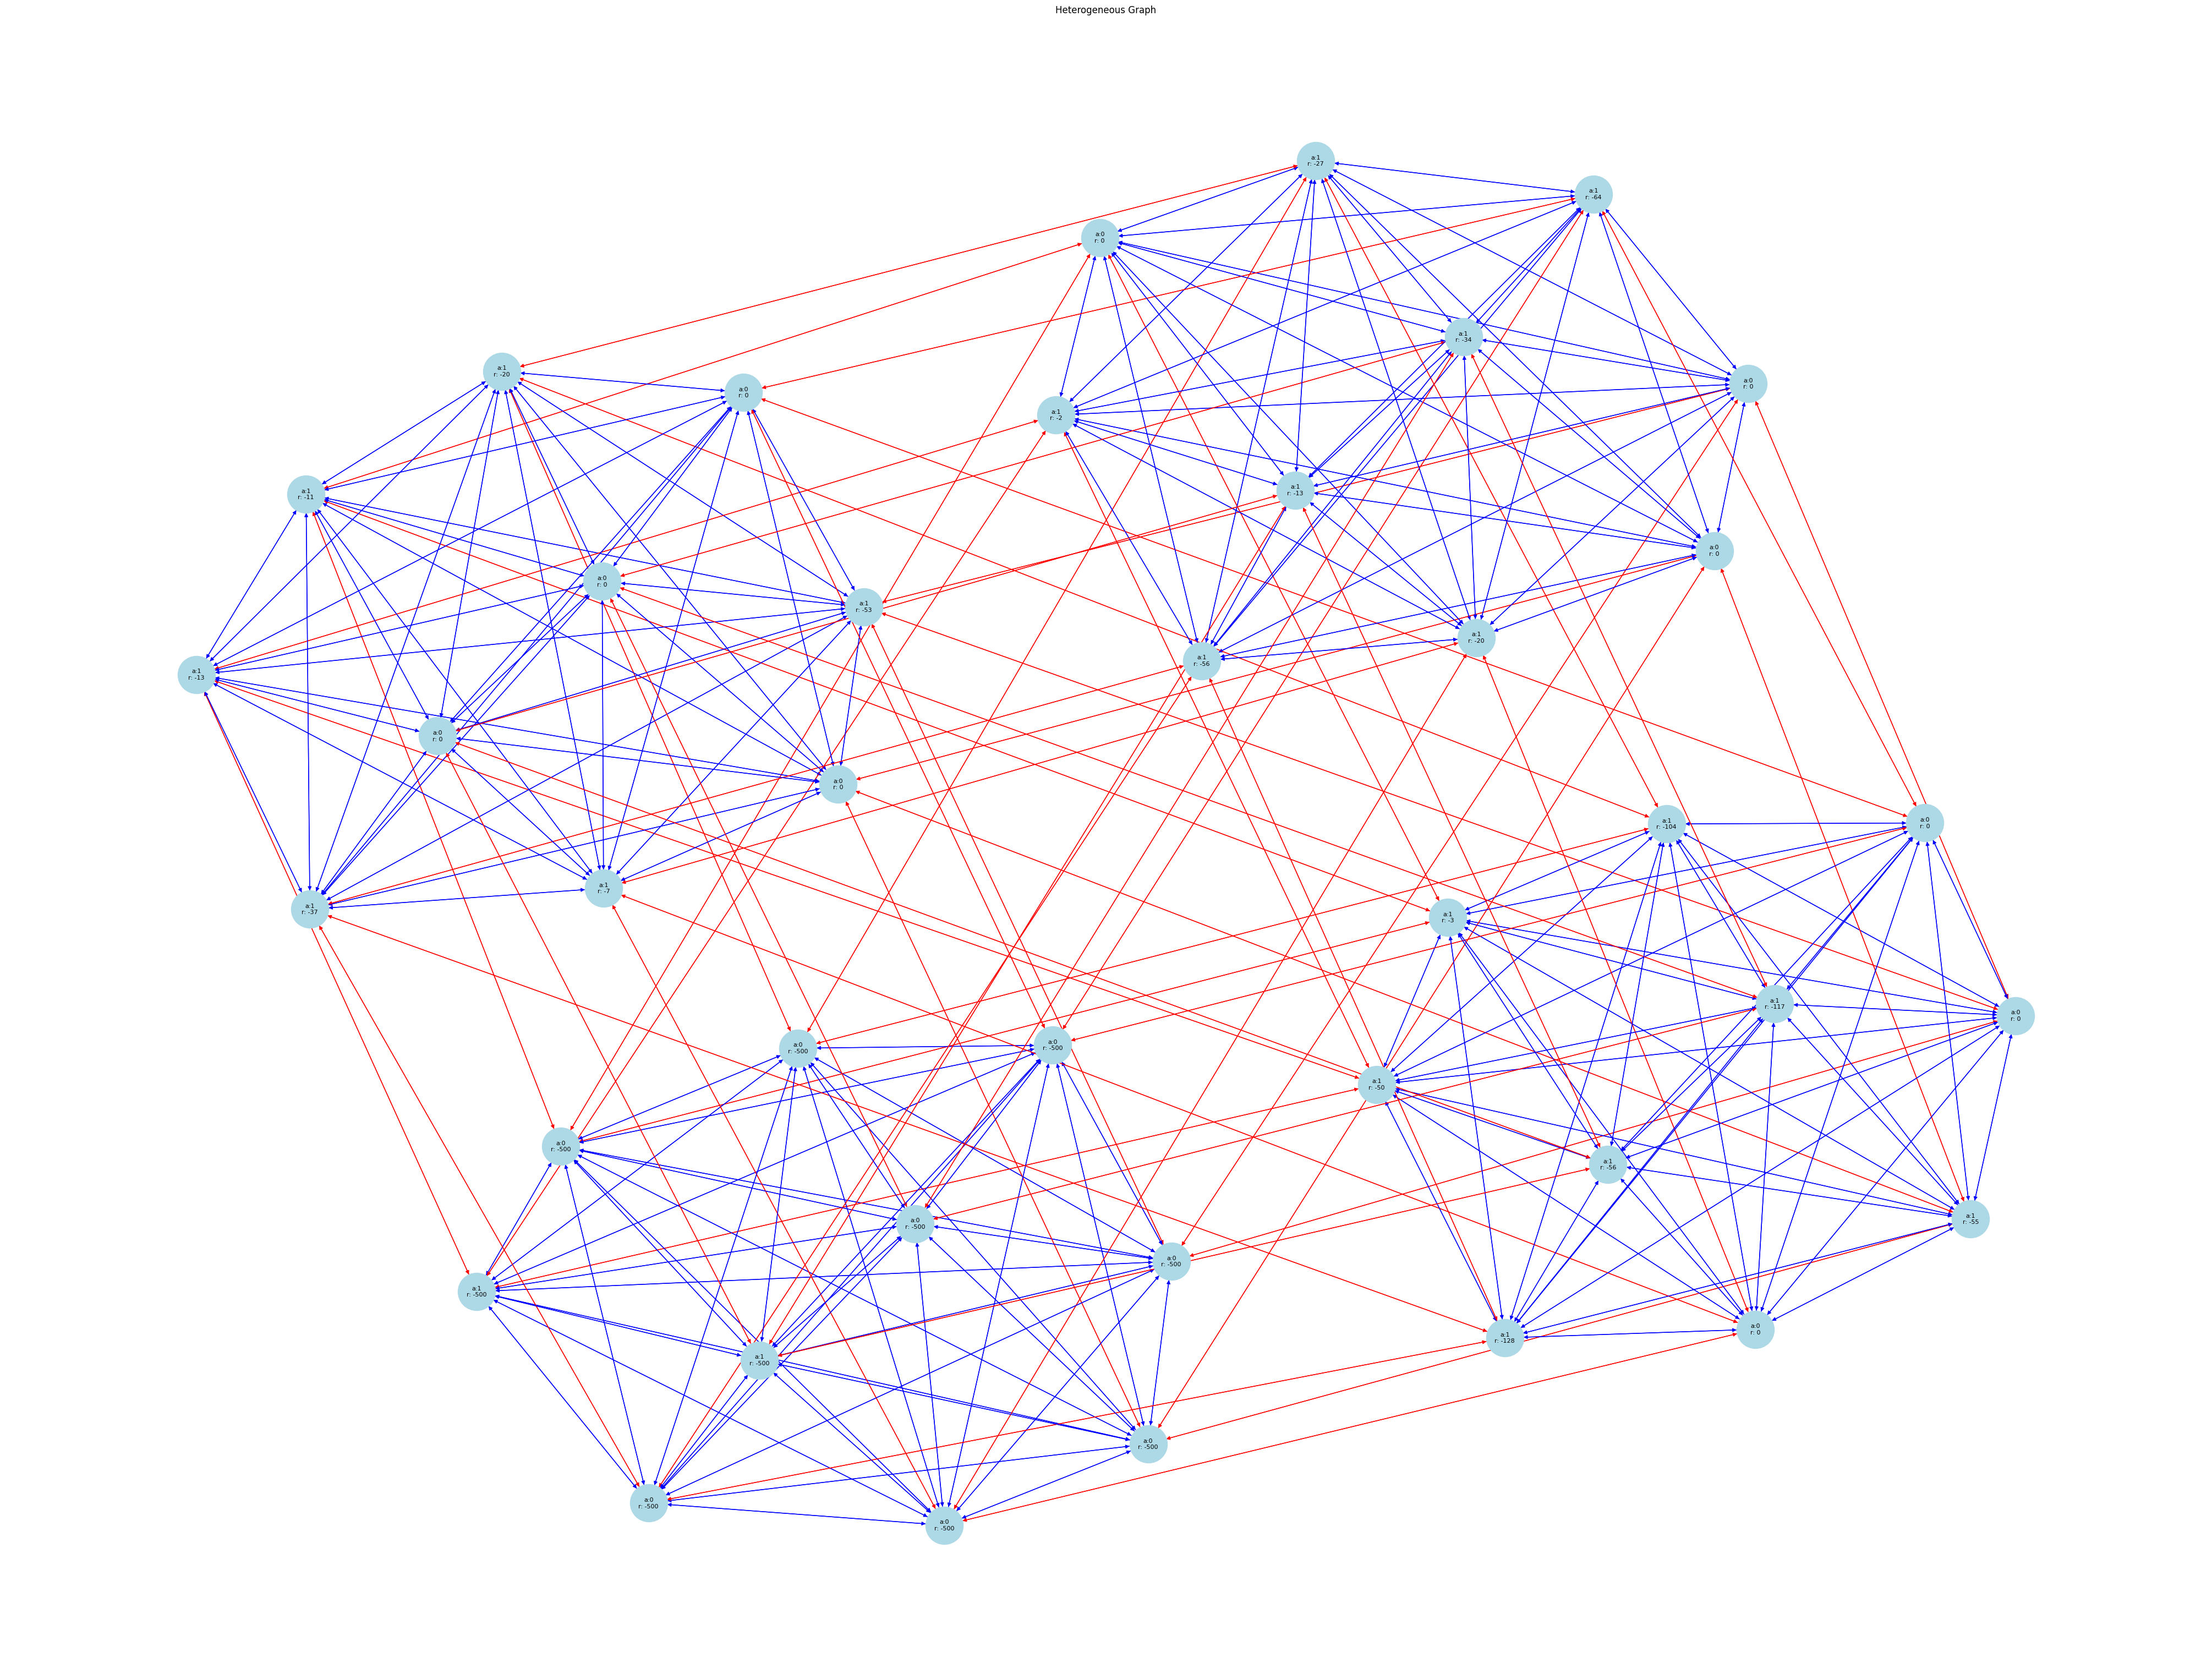

In [16]:
import torch
from torch_geometric.data import HeteroData
import networkx as nx
import matplotlib.pyplot as plt

data = loaded_data['obs'][0][0].cpu()
# Convert HeteroData to NetworkX
G = nx.DiGraph()  # Use DiGraph for directed edges

# Add nodes with type
for node_type in data.node_types:
    num_nodes = data[node_type].x.size(0)
    G.add_nodes_from(range(num_nodes), type=node_type)

# Add edges with type
for edge_type in data.edge_types:
    edge_index = data[edge_type].edge_index.numpy()
    src_type, relation, dst_type = edge_type
    for src, dst in zip(edge_index[0], edge_index[1]):
        G.add_edge(src, dst, relation=relation, edge_type=relation)

# edge colors
edge_type_colors = {
    "same_ap": "red",
    "same_ue": "blue"
}
edge_colors = [edge_type_colors[G[u][v]['edge_type']] for u, v in G.edges]

# node labels
node_label = {}
for i, (a, r) in enumerate(zip(loaded_data['actions'][0][0], loaded_data['reward'][0][0])):
    node_label[i] = f"a:{int(a.item())}\nr: {int(r.item())}"

# plotting
plt.figure(figsize=(40, 30))
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(G, pos, with_labels=False, node_size=2400, edge_color=edge_colors, node_color="lightblue")
nx.draw_networkx_labels(G, pos, node_label, font_size=8, font_color="black")
# nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'relation'))
plt.title("Heterogeneous Graph")
plt.show()


torch.Size([40, 1])

tensor([[-0.5177,  0.8834,  2.3701, -1.7158],
        [ 0.3068, -0.0917,  0.7924,  0.4124],
        [-0.2769, -1.3749,  1.9496,  1.4090],
        [-1.1771,  1.2159,  1.7622, -1.0378],
        [ 0.3439, -1.6922,  2.6870,  1.7040],
        [-1.1270,  0.6990,  2.1665, -0.2101],
        [-0.2281,  0.3327,  2.4346, -0.5217],
        [ 0.3339, -0.9428,  2.7622,  1.1805],
        [ 0.5137,  0.3237,  2.8261, -0.4254],
        [-1.6594,  1.4956,  1.6519, -1.3411],
        [ 1.5140, -1.2382,  2.0815,  1.3225],
        [-1.2250, -1.1725,  0.4845, -0.1562],
        [ 2.0141,  0.4528,  1.5198, -0.6238],
        [-0.4561,  0.1963,  0.9044, -0.8039],
        [-0.8191, -0.5685,  0.3834, -0.9751],
        [-1.0833,  0.6941,  1.7339, -0.1194],
        [ 0.7397,  1.1097,  1.6001, -1.0340],
        [ 1.3741,  1.7110,  1.9694,  1.6280],
        [ 0.8196, -1.5576,  1.6010, -1.2774],
        [ 0.8595, -1.5447,  0.9917, -1.3928],
        [-1.3480, -0.9343,  2.7089,  0.6255],
        [ 1.0055,  0.8506,  1.1160

In [10]:
K = 3
M = 5
same_ue = []
same_ap = []

for cntr_1 in range(K * M):
    for cntr_2 in range(K * M):
        if cntr_1 == cntr_2:
            continue
        if cntr_1 % K == cntr_2 % K:
            same_ue.append((cntr_1, cntr_2))
        elif int(cntr_1 / K) == int(cntr_2 / K):
            same_ap.append((cntr_1, cntr_2))
        else:
            pass

In [11]:
print(same_ap)

[(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (3, 4), (3, 5), (4, 3), (4, 5), (5, 3), (5, 4), (6, 7), (6, 8), (7, 6), (7, 8), (8, 6), (8, 7), (9, 10), (9, 11), (10, 9), (10, 11), (11, 9), (11, 10), (12, 13), (12, 14), (13, 12), (13, 14), (14, 12), (14, 13)]
